In [1]:
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping

In [2]:
from dvclive.keras import DVCLiveCallback
from dvclive import Live

live = Live(save_dvc_exp=True)

In [3]:
import pathlib
 
# current working directory
print(pathlib.Path().absolute())

/Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/notebooks

In [4]:
from sorcery import (assigned_names, unpack_keys, unpack_attrs,
                     dict_of, print_args, call_with_name,
                     delegate_to_attr, maybe, select_from)

### PARAMS

In [5]:
UTILS_DIR = "./"
DATA_DIR = '../data/'
MAX_LEN = 20
EPOCHS = 100
EARLY_STOPPING_MONITOR = 'val_loss'
EARLY_STOPPING_MIN_DELTA = 0
EARLY_STOPPING_PATIENCE = 5
EARLY_STOPPING_MODE = 'auto'

# # UI friendly ??
# training_params = dict_of(MAX_LEN, EPOCHS, EARLY_STOPPING_MONITOR, EARLY_STOPPING_MIN_DELTA, EARLY_STOPPING_PATIENCE, EARLY_STOPPING_MODE)

In [6]:
# Parameters
UTILS_DIR = "./"
DATA_DIR = "../data/"
MAX_LEN = 20
EPOCHS = 100
EARLY_STOPPING_MONITOR = "val_loss"
EARLY_STOPPING_MIN_DELTA = 0
EARLY_STOPPING_PATIENCE = 5
EARLY_STOPPING_MODE = "auto"


### Added by DataScientists

### Added by DataScientists

In [7]:
sys.path.append(UTILS_DIR)

from utils.plot_target import plot_target

### Added by DataScientists

## TRAINING

In [8]:
X = pickle.load(open(DATA_DIR + 'X.pckl', 'rb'))
X_train = pickle.load(open(DATA_DIR + 'X_train.pckl', 'rb'))
X_test = pickle.load(open(DATA_DIR + 'X_test.pckl', 'rb'))

y = pickle.load(open(DATA_DIR + 'y.pckl', 'rb'))
y_train = pickle.load(open(DATA_DIR + 'y_train.pckl', 'rb'))
y_test = pickle.load(open(DATA_DIR + 'y_test.pckl', 'rb'))

In [9]:
X_train

4531    experienced urogyn trying help mesh injured wo...
195                             know way ambulance coming
804     parksboardfacts first zippoline one wants use ...
173     two air ambulances scene serious crash two car...
560                                    gon get rap battle
                              ...                        
6270    looks like perfect storm free evening coming c...
2120               first trial death cecil lion postponed
1511    myvintagesoul british upper class manservant p...
2264    businesses deluged invoices make urs stand col...
2294    news update enugu government demolish illegal ...
Name: Text_cleaning, Length: 6090, dtype: object

In [10]:
counter = pickle.load(open(DATA_DIR + 'counter.pckl', 'rb'))

In [11]:
num_words = len(counter)

In [12]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [13]:
X_train = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(X_train, maxlen = MAX_LEN, truncating="post")

In [14]:
X_test = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(X_test,maxlen=MAX_LEN, truncating="post")

In [15]:
my_callbacks  = [EarlyStopping(monitor = EARLY_STOPPING_MONITOR,
                              min_delta = EARLY_STOPPING_MIN_DELTA,
                              patience =  EARLY_STOPPING_PATIENCE,
                              mode = EARLY_STOPPING_MODE),
                DVCLiveCallback(save_dvc_exp=True)] #adding DVCLive callback

In [16]:
model = Sequential()
model.add(Embedding(num_words, 32,input_length=MAX_LEN))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


In [17]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(train_padded, y_train, epochs=EPOCHS, validation_data=(test_padded, y_test), callbacks=my_callbacks)

Epoch 1/100


2023-04-24 13:53:36.735964: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



  1/191 [..............................] - ETA: 3:05 - loss: 0.6903 - accuracy: 0.6875


  3/191 [..............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5833  


  6/191 [..............................] - ETA: 4s - loss: 0.6883 - accuracy: 0.5938


  9/191 [>.............................] - ETA: 4s - loss: 0.6877 - accuracy: 0.5799


 12/191 [>.............................] - ETA: 4s - loss: 0.6837 - accuracy: 0.5885


 15/191 [=>............................] - ETA: 3s - loss: 0.6832 - accuracy: 0.5813


 18/191 [=>............................] - ETA: 3s - loss: 0.6767 - accuracy: 0.5920


 22/191 [==>...........................] - ETA: 3s - loss: 0.6798 - accuracy: 0.5781


 25/191 [==>...........................] - ETA: 3s - loss: 0.6839 - accuracy: 0.5663


 28/191 [===>..........................] - ETA: 3s - loss: 0.6838 - accuracy: 0.5625


 31/191 [===>..........................] - ETA: 3s - loss: 0.6838 - accuracy: 0.5565


 35/191 [====>.........................] - ETA: 3s - loss: 0.6829 - accuracy: 0.5571


 38/191 [====>.........................] - ETA: 3s - loss: 0.6821 - accuracy: 0.5576


 42/191 [=====>........................] - ETA: 3s - loss: 0.6805 - accuracy: 0.5603


 46/191 [======>.......................] - ETA: 2s - loss: 0.6807 - accuracy: 0.5618


 49/191 [======>.......................] - ETA: 2s - loss: 0.6804 - accuracy: 0.5612


 53/191 [=======>......................] - ETA: 2s - loss: 0.6797 - accuracy: 0.5643


 56/191 [=======>......................] - ETA: 2s - loss: 0.6787 - accuracy: 0.5664


 59/191 [========>.....................] - ETA: 2s - loss: 0.6775 - accuracy: 0.5710


 63/191 [========>.....................] - ETA: 2s - loss: 0.6774 - accuracy: 0.5699


 66/191 [=========>....................] - ETA: 2s - loss: 0.6765 - accuracy: 0.5720


 69/191 [=========>....................] - ETA: 2s - loss: 0.6760 - accuracy: 0.5761


 72/191 [==========>...................] - ETA: 2s - loss: 0.6741 - accuracy: 0.5820


 76/191 [==========>...................] - ETA: 2s - loss: 0.6715 - accuracy: 0.5900


 80/191 [===========>..................] - ETA: 2s - loss: 0.6683 - accuracy: 0.5965


 84/191 [============>.................] - ETA: 2s - loss: 0.6670 - accuracy: 0.6008


 89/191 [============>.................] - ETA: 1s - loss: 0.6643 - accuracy: 0.6057


 93/191 [=============>................] - ETA: 1s - loss: 0.6626 - accuracy: 0.6106


 98/191 [==============>...............] - ETA: 1s - loss: 0.6599 - accuracy: 0.6215


102/191 [===============>..............] - ETA: 1s - loss: 0.6564 - accuracy: 0.6284


106/191 [===============>..............] - ETA: 1s - loss: 0.6526 - accuracy: 0.6338


110/191 [================>.............] - ETA: 1s - loss: 0.6485 - accuracy: 0.6372


115/191 [=================>............] - ETA: 1s - loss: 0.6437 - accuracy: 0.6432


120/191 [=================>............] - ETA: 1s - loss: 0.6386 - accuracy: 0.6490


124/191 [==================>...........] - ETA: 1s - loss: 0.6364 - accuracy: 0.6507


129/191 [===================>..........] - ETA: 1s - loss: 0.6300 - accuracy: 0.6562


132/191 [===================>..........] - ETA: 1s - loss: 0.6301 - accuracy: 0.6555


137/191 [====================>.........] - ETA: 0s - loss: 0.6261 - accuracy: 0.6592


142/191 [=====================>........] - ETA: 0s - loss: 0.6216 - accuracy: 0.6631


147/191 [======================>.......] - ETA: 0s - loss: 0.6153 - accuracy: 0.6671


151/191 [======================>.......] - ETA: 0s - loss: 0.6114 - accuracy: 0.6703


155/191 [=======================>......] - ETA: 0s - loss: 0.6045 - accuracy: 0.6750


160/191 [========================>.....] - ETA: 0s - loss: 0.5996 - accuracy: 0.6787


164/191 [========================>.....] - ETA: 0s - loss: 0.5956 - accuracy: 0.6812


168/191 [=========================>....] - ETA: 0s - loss: 0.5940 - accuracy: 0.6832


171/191 [=========================>....] - ETA: 0s - loss: 0.5905 - accuracy: 0.6851


175/191 [==========================>...] - ETA: 0s - loss: 0.5890 - accuracy: 0.6870


178/191 [==========================>...] - ETA: 0s - loss: 0.5870 - accuracy: 0.6891


182/191 [===========================>..] - ETA: 0s - loss: 0.5832 - accuracy: 0.6927


187/191 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.6960


191/191 [==============================] - ETA: 0s - loss: 0.5788 - accuracy: 0.6966


191/191 [==============================] - 5s 19ms/step - loss: 0.5788 - accuracy: 0.6966 - val_loss: 0.4505 - val_accuracy: 0.7958


Epoch 2/100



  1/191 [..............................] - ETA: 2s - loss: 0.3554 - accuracy: 0.8750


  5/191 [..............................] - ETA: 2s - loss: 0.2989 - accuracy: 0.9125


  8/191 [>.............................] - ETA: 2s - loss: 0.3346 - accuracy: 0.8750


 12/191 [>.............................] - ETA: 2s - loss: 0.3239 - accuracy: 0.8828


 16/191 [=>............................] - ETA: 2s - loss: 0.3213 - accuracy: 0.8848


 21/191 [==>...........................] - ETA: 2s - loss: 0.3116 - accuracy: 0.8884


 25/191 [==>...........................] - ETA: 2s - loss: 0.3017 - accuracy: 0.8913


 29/191 [===>..........................] - ETA: 2s - loss: 0.3073 - accuracy: 0.8879


 33/191 [====>.........................] - ETA: 2s - loss: 0.3094 - accuracy: 0.8807


 36/191 [====>.........................] - ETA: 2s - loss: 0.3177 - accuracy: 0.8741


 39/191 [=====>........................] - ETA: 2s - loss: 0.3203 - accuracy: 0.8726


 43/191 [=====>........................] - ETA: 2s - loss: 0.3206 - accuracy: 0.8743


 46/191 [======>.......................] - ETA: 2s - loss: 0.3159 - accuracy: 0.8777


 49/191 [======>.......................] - ETA: 2s - loss: 0.3149 - accuracy: 0.8763


 53/191 [=======>......................] - ETA: 2s - loss: 0.3163 - accuracy: 0.8768


 56/191 [=======>......................] - ETA: 2s - loss: 0.3156 - accuracy: 0.8772


 60/191 [========>.....................] - ETA: 1s - loss: 0.3139 - accuracy: 0.8776


 64/191 [=========>....................] - ETA: 1s - loss: 0.3104 - accuracy: 0.8799


 68/191 [=========>....................] - ETA: 1s - loss: 0.3140 - accuracy: 0.8791


 72/191 [==========>...................] - ETA: 1s - loss: 0.3149 - accuracy: 0.8767


 76/191 [==========>...................] - ETA: 1s - loss: 0.3160 - accuracy: 0.8750


 80/191 [===========>..................] - ETA: 1s - loss: 0.3172 - accuracy: 0.8742


 84/191 [============>.................] - ETA: 1s - loss: 0.3191 - accuracy: 0.8720


 88/191 [============>.................] - ETA: 1s - loss: 0.3192 - accuracy: 0.8718


 92/191 [=============>................] - ETA: 1s - loss: 0.3203 - accuracy: 0.8716


 96/191 [==============>...............] - ETA: 1s - loss: 0.3215 - accuracy: 0.8711


100/191 [==============>...............] - ETA: 1s - loss: 0.3229 - accuracy: 0.8691


104/191 [===============>..............] - ETA: 1s - loss: 0.3207 - accuracy: 0.8702


108/191 [===============>..............] - ETA: 1s - loss: 0.3221 - accuracy: 0.8695


113/191 [================>.............] - ETA: 1s - loss: 0.3229 - accuracy: 0.8686


117/191 [=================>............] - ETA: 1s - loss: 0.3206 - accuracy: 0.8702


121/191 [==================>...........] - ETA: 1s - loss: 0.3258 - accuracy: 0.8667


124/191 [==================>...........] - ETA: 0s - loss: 0.3215 - accuracy: 0.8684


126/191 [==================>...........] - ETA: 0s - loss: 0.3227 - accuracy: 0.8683


130/191 [===================>..........] - ETA: 0s - loss: 0.3227 - accuracy: 0.8675


134/191 [====================>.........] - ETA: 0s - loss: 0.3241 - accuracy: 0.8678


138/191 [====================>.........] - ETA: 0s - loss: 0.3227 - accuracy: 0.8687


142/191 [=====================>........] - ETA: 0s - loss: 0.3249 - accuracy: 0.8680


146/191 [=====================>........] - ETA: 0s - loss: 0.3223 - accuracy: 0.8692


150/191 [======================>.......] - ETA: 0s - loss: 0.3230 - accuracy: 0.8694


154/191 [=======================>......] - ETA: 0s - loss: 0.3230 - accuracy: 0.8693


158/191 [=======================>......] - ETA: 0s - loss: 0.3229 - accuracy: 0.8697


162/191 [========================>.....] - ETA: 0s - loss: 0.3252 - accuracy: 0.8684


166/191 [=========================>....] - ETA: 0s - loss: 0.3269 - accuracy: 0.8673


169/191 [=========================>....] - ETA: 0s - loss: 0.3266 - accuracy: 0.8672


173/191 [==========================>...] - ETA: 0s - loss: 0.3262 - accuracy: 0.8683


177/191 [==========================>...] - ETA: 0s - loss: 0.3270 - accuracy: 0.8676


182/191 [===========================>..] - ETA: 0s - loss: 0.3255 - accuracy: 0.8680


187/191 [============================>.] - ETA: 0s - loss: 0.3253 - accuracy: 0.8670


191/191 [==============================] - ETA: 0s - loss: 0.3258 - accuracy: 0.8672


191/191 [==============================] - 3s 16ms/step - loss: 0.3258 - accuracy: 0.8672 - val_loss: 0.4744 - val_accuracy: 0.8030


Epoch 3/100



  1/191 [..............................] - ETA: 2s - loss: 0.2355 - accuracy: 0.9375


  5/191 [..............................] - ETA: 2s - loss: 0.1757 - accuracy: 0.9438


  9/191 [>.............................] - ETA: 2s - loss: 0.1973 - accuracy: 0.9306


 14/191 [=>............................] - ETA: 2s - loss: 0.2026 - accuracy: 0.9241


 19/191 [=>............................] - ETA: 2s - loss: 0.1935 - accuracy: 0.9326


 24/191 [==>...........................] - ETA: 2s - loss: 0.1797 - accuracy: 0.9388


 28/191 [===>..........................] - ETA: 2s - loss: 0.1772 - accuracy: 0.9397


 33/191 [====>.........................] - ETA: 2s - loss: 0.1843 - accuracy: 0.9375


 37/191 [====>.........................] - ETA: 2s - loss: 0.1913 - accuracy: 0.9341


 42/191 [=====>........................] - ETA: 1s - loss: 0.1833 - accuracy: 0.9368


 47/191 [======>.......................] - ETA: 1s - loss: 0.1817 - accuracy: 0.9388


 52/191 [=======>......................] - ETA: 1s - loss: 0.1771 - accuracy: 0.9393


 57/191 [=======>......................] - ETA: 1s - loss: 0.1731 - accuracy: 0.9413


 61/191 [========>.....................] - ETA: 1s - loss: 0.1733 - accuracy: 0.9426


 66/191 [=========>....................] - ETA: 1s - loss: 0.1759 - accuracy: 0.9427


 70/191 [=========>....................] - ETA: 1s - loss: 0.1800 - accuracy: 0.9411


 74/191 [==========>...................] - ETA: 1s - loss: 0.1806 - accuracy: 0.9400


 79/191 [===========>..................] - ETA: 1s - loss: 0.1892 - accuracy: 0.9379


 83/191 [============>.................] - ETA: 1s - loss: 0.1899 - accuracy: 0.9379


 87/191 [============>.................] - ETA: 1s - loss: 0.1862 - accuracy: 0.9397


 92/191 [=============>................] - ETA: 1s - loss: 0.1831 - accuracy: 0.9406


 97/191 [==============>...............] - ETA: 1s - loss: 0.1843 - accuracy: 0.9398


101/191 [==============>...............] - ETA: 1s - loss: 0.1826 - accuracy: 0.9397


105/191 [===============>..............] - ETA: 1s - loss: 0.1820 - accuracy: 0.9399


109/191 [================>.............] - ETA: 1s - loss: 0.1822 - accuracy: 0.9392


113/191 [================>.............] - ETA: 1s - loss: 0.1816 - accuracy: 0.9386


117/191 [=================>............] - ETA: 0s - loss: 0.1827 - accuracy: 0.9378


121/191 [==================>...........] - ETA: 0s - loss: 0.1838 - accuracy: 0.9362


125/191 [==================>...........] - ETA: 0s - loss: 0.1872 - accuracy: 0.9345


130/191 [===================>..........] - ETA: 0s - loss: 0.1889 - accuracy: 0.9334


135/191 [====================>.........] - ETA: 0s - loss: 0.1893 - accuracy: 0.9333


140/191 [====================>.........] - ETA: 0s - loss: 0.1888 - accuracy: 0.9335


144/191 [=====================>........] - ETA: 0s - loss: 0.1891 - accuracy: 0.9334


148/191 [======================>.......] - ETA: 0s - loss: 0.1885 - accuracy: 0.9337


151/191 [======================>.......] - ETA: 0s - loss: 0.1886 - accuracy: 0.9338


155/191 [=======================>......] - ETA: 0s - loss: 0.1911 - accuracy: 0.9325


159/191 [=======================>......] - ETA: 0s - loss: 0.1921 - accuracy: 0.9310


163/191 [========================>.....] - ETA: 0s - loss: 0.1930 - accuracy: 0.9304


168/191 [=========================>....] - ETA: 0s - loss: 0.1920 - accuracy: 0.9304


173/191 [==========================>...] - ETA: 0s - loss: 0.1919 - accuracy: 0.9308


178/191 [==========================>...] - ETA: 0s - loss: 0.1924 - accuracy: 0.9307


183/191 [===========================>..] - ETA: 0s - loss: 0.1939 - accuracy: 0.9302


188/191 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9297


191/191 [==============================] - ETA: 0s - loss: 0.1938 - accuracy: 0.9296


191/191 [==============================] - 3s 14ms/step - loss: 0.1938 - accuracy: 0.9296 - val_loss: 0.5356 - val_accuracy: 0.7905


Epoch 4/100



  1/191 [..............................] - ETA: 3s - loss: 0.0446 - accuracy: 1.0000


  5/191 [..............................] - ETA: 2s - loss: 0.0792 - accuracy: 0.9625


 10/191 [>.............................] - ETA: 2s - loss: 0.1030 - accuracy: 0.9531


 15/191 [=>............................] - ETA: 2s - loss: 0.0968 - accuracy: 0.9604


 19/191 [=>............................] - ETA: 2s - loss: 0.0938 - accuracy: 0.9605


 23/191 [==>...........................] - ETA: 2s - loss: 0.0962 - accuracy: 0.9606


 27/191 [===>..........................] - ETA: 2s - loss: 0.0952 - accuracy: 0.9618


 32/191 [====>.........................] - ETA: 1s - loss: 0.0989 - accuracy: 0.9600


 37/191 [====>.........................] - ETA: 1s - loss: 0.1103 - accuracy: 0.9569


 40/191 [=====>........................] - ETA: 2s - loss: 0.1094 - accuracy: 0.9578


 44/191 [=====>........................] - ETA: 2s - loss: 0.1072 - accuracy: 0.9588


 46/191 [======>.......................] - ETA: 2s - loss: 0.1069 - accuracy: 0.9592


 49/191 [======>.......................] - ETA: 2s - loss: 0.1066 - accuracy: 0.9598


 53/191 [=======>......................] - ETA: 2s - loss: 0.1048 - accuracy: 0.9611


 57/191 [=======>......................] - ETA: 1s - loss: 0.1017 - accuracy: 0.9627


 61/191 [========>.....................] - ETA: 1s - loss: 0.1087 - accuracy: 0.9600


 65/191 [=========>....................] - ETA: 1s - loss: 0.1113 - accuracy: 0.9591


 70/191 [=========>....................] - ETA: 1s - loss: 0.1129 - accuracy: 0.9589


 73/191 [==========>...................] - ETA: 1s - loss: 0.1136 - accuracy: 0.9576


 77/191 [===========>..................] - ETA: 1s - loss: 0.1127 - accuracy: 0.9582


 81/191 [===========>..................] - ETA: 1s - loss: 0.1177 - accuracy: 0.9568


 85/191 [============>.................] - ETA: 1s - loss: 0.1188 - accuracy: 0.9570


 89/191 [============>.................] - ETA: 1s - loss: 0.1165 - accuracy: 0.9582


 94/191 [=============>................] - ETA: 1s - loss: 0.1132 - accuracy: 0.9594


 99/191 [==============>...............] - ETA: 1s - loss: 0.1129 - accuracy: 0.9596


103/191 [===============>..............] - ETA: 1s - loss: 0.1152 - accuracy: 0.9590


107/191 [===============>..............] - ETA: 1s - loss: 0.1140 - accuracy: 0.9594


111/191 [================>.............] - ETA: 1s - loss: 0.1149 - accuracy: 0.9589


115/191 [=================>............] - ETA: 1s - loss: 0.1175 - accuracy: 0.9579


119/191 [=================>............] - ETA: 1s - loss: 0.1200 - accuracy: 0.9575


124/191 [==================>...........] - ETA: 0s - loss: 0.1190 - accuracy: 0.9579


128/191 [===================>..........] - ETA: 0s - loss: 0.1189 - accuracy: 0.9583


132/191 [===================>..........] - ETA: 0s - loss: 0.1202 - accuracy: 0.9583


136/191 [====================>.........] - ETA: 0s - loss: 0.1208 - accuracy: 0.9582


140/191 [====================>.........] - ETA: 0s - loss: 0.1207 - accuracy: 0.9580


145/191 [=====================>........] - ETA: 0s - loss: 0.1220 - accuracy: 0.9578


150/191 [======================>.......] - ETA: 0s - loss: 0.1221 - accuracy: 0.9569


154/191 [=======================>......] - ETA: 0s - loss: 0.1223 - accuracy: 0.9566


159/191 [=======================>......] - ETA: 0s - loss: 0.1220 - accuracy: 0.9570


163/191 [========================>.....] - ETA: 0s - loss: 0.1229 - accuracy: 0.9565


167/191 [=========================>....] - ETA: 0s - loss: 0.1240 - accuracy: 0.9562


171/191 [=========================>....] - ETA: 0s - loss: 0.1254 - accuracy: 0.9554


175/191 [==========================>...] - ETA: 0s - loss: 0.1255 - accuracy: 0.9552


179/191 [===========================>..] - ETA: 0s - loss: 0.1249 - accuracy: 0.9553


183/191 [===========================>..] - ETA: 0s - loss: 0.1260 - accuracy: 0.9551


187/191 [============================>.] - ETA: 0s - loss: 0.1249 - accuracy: 0.9552


191/191 [==============================] - ETA: 0s - loss: 0.1260 - accuracy: 0.9547


191/191 [==============================] - 3s 15ms/step - loss: 0.1260 - accuracy: 0.9547 - val_loss: 0.6538 - val_accuracy: 0.7800


Epoch 5/100



  1/191 [..............................] - ETA: 2s - loss: 0.0339 - accuracy: 1.0000


  6/191 [..............................] - ETA: 2s - loss: 0.0456 - accuracy: 0.9948


 11/191 [>.............................] - ETA: 2s - loss: 0.0519 - accuracy: 0.9886


 15/191 [=>............................] - ETA: 2s - loss: 0.0695 - accuracy: 0.9812


 20/191 [==>...........................] - ETA: 2s - loss: 0.0659 - accuracy: 0.9812


 24/191 [==>...........................] - ETA: 2s - loss: 0.0700 - accuracy: 0.9792


 29/191 [===>..........................] - ETA: 2s - loss: 0.0690 - accuracy: 0.9774


 34/191 [====>.........................] - ETA: 1s - loss: 0.0723 - accuracy: 0.9743


 38/191 [====>.........................] - ETA: 1s - loss: 0.0713 - accuracy: 0.9737


 42/191 [=====>........................] - ETA: 1s - loss: 0.0752 - accuracy: 0.9710


 46/191 [======>.......................] - ETA: 1s - loss: 0.0758 - accuracy: 0.9708


 51/191 [=======>......................] - ETA: 1s - loss: 0.0825 - accuracy: 0.9694


 56/191 [=======>......................] - ETA: 1s - loss: 0.0833 - accuracy: 0.9693


 60/191 [========>.....................] - ETA: 1s - loss: 0.0843 - accuracy: 0.9698


 65/191 [=========>....................] - ETA: 1s - loss: 0.0882 - accuracy: 0.9683


 70/191 [=========>....................] - ETA: 1s - loss: 0.0892 - accuracy: 0.9683


 75/191 [==========>...................] - ETA: 1s - loss: 0.0947 - accuracy: 0.9663


 80/191 [===========>..................] - ETA: 1s - loss: 0.0959 - accuracy: 0.9656


 85/191 [============>.................] - ETA: 1s - loss: 0.0961 - accuracy: 0.9654


 89/191 [============>.................] - ETA: 1s - loss: 0.0959 - accuracy: 0.9652


 94/191 [=============>................] - ETA: 1s - loss: 0.0956 - accuracy: 0.9658


 99/191 [==============>...............] - ETA: 1s - loss: 0.0972 - accuracy: 0.9643


104/191 [===============>..............] - ETA: 1s - loss: 0.0956 - accuracy: 0.9651


109/191 [================>.............] - ETA: 1s - loss: 0.0933 - accuracy: 0.9659


114/191 [================>.............] - ETA: 0s - loss: 0.0961 - accuracy: 0.9652


118/191 [=================>............] - ETA: 0s - loss: 0.0956 - accuracy: 0.9656


123/191 [==================>...........] - ETA: 0s - loss: 0.0963 - accuracy: 0.9649


128/191 [===================>..........] - ETA: 0s - loss: 0.0953 - accuracy: 0.9653


132/191 [===================>..........] - ETA: 0s - loss: 0.0942 - accuracy: 0.9657


137/191 [====================>.........] - ETA: 0s - loss: 0.0940 - accuracy: 0.9656


141/191 [=====================>........] - ETA: 0s - loss: 0.0949 - accuracy: 0.9654


145/191 [=====================>........] - ETA: 0s - loss: 0.0940 - accuracy: 0.9657


150/191 [======================>.......] - ETA: 0s - loss: 0.0956 - accuracy: 0.9652


154/191 [=======================>......] - ETA: 0s - loss: 0.0961 - accuracy: 0.9655


159/191 [=======================>......] - ETA: 0s - loss: 0.0954 - accuracy: 0.9658


164/191 [========================>.....] - ETA: 0s - loss: 0.0958 - accuracy: 0.9657


168/191 [=========================>....] - ETA: 0s - loss: 0.0949 - accuracy: 0.9661


173/191 [==========================>...] - ETA: 0s - loss: 0.0958 - accuracy: 0.9657


178/191 [==========================>...] - ETA: 0s - loss: 0.0959 - accuracy: 0.9659


183/191 [===========================>..] - ETA: 0s - loss: 0.0964 - accuracy: 0.9658


187/191 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9659


191/191 [==============================] - ETA: 0s - loss: 0.0961 - accuracy: 0.9662


191/191 [==============================] - 3s 14ms/step - loss: 0.0961 - accuracy: 0.9662 - val_loss: 0.7183 - val_accuracy: 0.7663


Epoch 6/100



  1/191 [..............................] - ETA: 2s - loss: 0.1202 - accuracy: 0.9375


  6/191 [..............................] - ETA: 2s - loss: 0.0619 - accuracy: 0.9792


 11/191 [>.............................] - ETA: 2s - loss: 0.0564 - accuracy: 0.9801


 15/191 [=>............................] - ETA: 2s - loss: 0.0455 - accuracy: 0.9854


 20/191 [==>...........................] - ETA: 2s - loss: 0.0453 - accuracy: 0.9812


 23/191 [==>...........................] - ETA: 2s - loss: 0.0612 - accuracy: 0.9783


 27/191 [===>..........................] - ETA: 2s - loss: 0.0563 - accuracy: 0.9815


 31/191 [===>..........................] - ETA: 2s - loss: 0.0531 - accuracy: 0.9829


 35/191 [====>.........................] - ETA: 2s - loss: 0.0546 - accuracy: 0.9830


 39/191 [=====>........................] - ETA: 2s - loss: 0.0559 - accuracy: 0.9824


 44/191 [=====>........................] - ETA: 1s - loss: 0.0565 - accuracy: 0.9830


 47/191 [======>.......................] - ETA: 1s - loss: 0.0581 - accuracy: 0.9814


 51/191 [=======>......................] - ETA: 1s - loss: 0.0575 - accuracy: 0.9804


 55/191 [=======>......................] - ETA: 1s - loss: 0.0565 - accuracy: 0.9807


 59/191 [========>.....................] - ETA: 1s - loss: 0.0595 - accuracy: 0.9783


 64/191 [=========>....................] - ETA: 1s - loss: 0.0595 - accuracy: 0.9780


 69/191 [=========>....................] - ETA: 1s - loss: 0.0640 - accuracy: 0.9755


 74/191 [==========>...................] - ETA: 1s - loss: 0.0657 - accuracy: 0.9755


 78/191 [===========>..................] - ETA: 1s - loss: 0.0654 - accuracy: 0.9756


 83/191 [============>.................] - ETA: 1s - loss: 0.0658 - accuracy: 0.9752


 88/191 [============>.................] - ETA: 1s - loss: 0.0672 - accuracy: 0.9744


 92/191 [=============>................] - ETA: 1s - loss: 0.0695 - accuracy: 0.9738


 96/191 [==============>...............] - ETA: 1s - loss: 0.0708 - accuracy: 0.9736


101/191 [==============>...............] - ETA: 1s - loss: 0.0707 - accuracy: 0.9737


106/191 [===============>..............] - ETA: 1s - loss: 0.0704 - accuracy: 0.9744


110/191 [================>.............] - ETA: 1s - loss: 0.0712 - accuracy: 0.9744


115/191 [=================>............] - ETA: 0s - loss: 0.0727 - accuracy: 0.9745


120/191 [=================>............] - ETA: 0s - loss: 0.0731 - accuracy: 0.9745


125/191 [==================>...........] - ETA: 0s - loss: 0.0738 - accuracy: 0.9743


129/191 [===================>..........] - ETA: 0s - loss: 0.0738 - accuracy: 0.9746


134/191 [====================>.........] - ETA: 0s - loss: 0.0734 - accuracy: 0.9750


138/191 [====================>.........] - ETA: 0s - loss: 0.0763 - accuracy: 0.9742


142/191 [=====================>........] - ETA: 0s - loss: 0.0767 - accuracy: 0.9740


147/191 [======================>.......] - ETA: 0s - loss: 0.0771 - accuracy: 0.9736


151/191 [======================>.......] - ETA: 0s - loss: 0.0762 - accuracy: 0.9741


156/191 [=======================>......] - ETA: 0s - loss: 0.0769 - accuracy: 0.9738


161/191 [========================>.....] - ETA: 0s - loss: 0.0786 - accuracy: 0.9734


166/191 [=========================>....] - ETA: 0s - loss: 0.0791 - accuracy: 0.9731


171/191 [=========================>....] - ETA: 0s - loss: 0.0810 - accuracy: 0.9720


176/191 [==========================>...] - ETA: 0s - loss: 0.0812 - accuracy: 0.9718


181/191 [===========================>..] - ETA: 0s - loss: 0.0811 - accuracy: 0.9717


186/191 [============================>.] - ETA: 0s - loss: 0.0817 - accuracy: 0.9718


191/191 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9714


191/191 [==============================] - 3s 14ms/step - loss: 0.0824 - accuracy: 0.9714 - val_loss: 0.7646 - val_accuracy: 0.7814


'/Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/data/counter.pckl' is busy, it is being blocked by:
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f

If there are no processes with such PIDs, you can manually remove '/Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/.dvc/tmp/rwlock' and try again.


INFO:dvclive:To run with DVC, add this to /Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/dvc.yaml:
stages:
  dvclive:
    cmd: <python my_code_file.py my_args>
    deps:
    - <my_code_file.py>



In [19]:
results = model.evaluate(test_padded, y_test, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.76459

Test Accuracy: 78.14%

In [20]:
live.log_metric("test_loss", results[0])
live.log_metric("test_accuracy", results[1])

In [21]:
# y_pred = model.predict_classes(test_padded)
predict_y =model.predict(test_padded) 
y_pred=np.argmax(predict_y,axis=1)


 1/48 [..............................] - ETA: 9s


16/48 [=========>....................] - ETA: 0s


34/48 [====================>.........] - ETA: 0s


48/48 [==============================] - ETA: 0s


48/48 [==============================] - 0s 3ms/step


In [22]:
print(classification_report(y_test, y_pred))

/Users/blarhdir/Documents/sw-data-mlops-internship/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/blarhdir/Documents/sw-data-mlops-internship/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/blarhdir/Documents/sw-data-mlops-internship/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74       896
           1       0.00      0.00      0.00       627

    accuracy                           0.59      1523
   macro avg       0.29      0.50      0.37      1523
weighted avg       0.35      0.59      0.44      1523


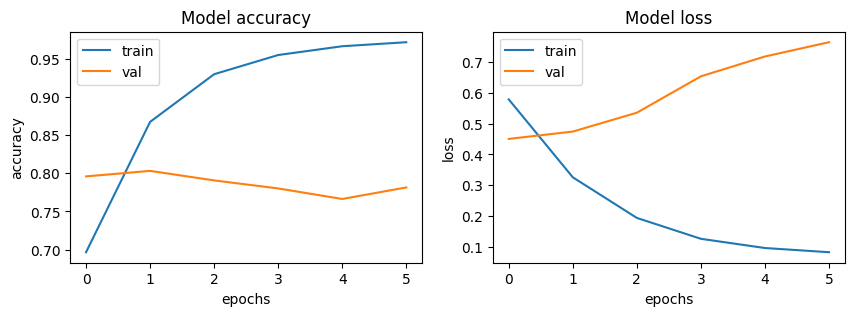

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])
    plt.savefig(DATA_DIR + "model_metrics.png")

In [24]:
live.end()

'/Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/data/counter.pckl' is busy, it is being blocked by:
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f
  (PID 50583): /opt/homebrew/anaconda3/bin/dvc repro -f

If there are no processes with such PIDs, you can manually remove '/Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/.dvc/tmp/rwlock' and try again.


INFO:dvclive:To run with DVC, add this to /Users/blarhdir/Documents/sw-data-mlops-internship/mlpipeline/dvc.yaml:
stages:
  dvclive:
    cmd: <python my_code_file.py my_args>
    deps:
    - <my_code_file.py>

